In [1]:
import cv2
import mediapipe as mp
import numpy as np
import uuid
import os
import math
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
import joblib

In [2]:
# Carregar os dados
data = pd.read_csv('Exerc6.csv', sep = ',')
data = data[data['gesture'] != 0]

In [3]:
data.head()

,landmark_0_x,landmark_1_x,landmark_2_x,landmark_3_x,landmark_4_x,landmark_5_x,landmark_6_x,landmark_7_x,landmark_8_x,landmark_9_x,...,landmark_12_z,landmark_13_z,landmark_14_z,landmark_15_z,landmark_16_z,landmark_17_z,landmark_18_z,landmark_19_z,landmark_20_z,gesture
35,0.431752,0.727758,8.123747e-07,0.556065,0.713681,-0.069001,0.654133,0.674296,-0.099920,0.699726,...,0.374019,0.494538,-0.076172,0.358865,0.459771,-0.088124,0.352031,0.428791,-0.094023,4
36,0.430839,0.727757,7.694131e-07,0.553098,0.713348,-0.067614,0.650892,0.672737,-0.096525,0.694087,...,0.374761,0.494831,-0.071032,0.358040,0.459945,-0.084536,0.349792,0.428622,-0.091374,4
37,0.430032,0.727718,7.750677e-07,0.551282,0.713870,-0.068019,0.649384,0.671858,-0.098352,0.693173,...,0.375248,0.494104,-0.071944,0.359546,0.459170,-0.083497,0.352048,0.427972,-0.088628,4
38,0.432090,0.727485,7.023941e-07,0.549586,0.713152,-0.066499,0.645055,0.671390,-0.098395,0.686005,...,0.376261,0.495125,-0.080929,0.360267,0.459448,-0.092669,0.353057,0.427261,-0.098074,4
39,0.432125,0.727138,6.664496e-07,0.549168,0.712271,-0.063503,0.643015,0.670740,-0.095622,0.683973,...,0.378050,0.495162,-0.082292,0.361830,0.459625,-0.092450,0.353481,0.427495,-0.097009,4


In [4]:
X = data.drop(columns=['gesture'])
y = data['gesture']

In [5]:
#Converter rótulo
label_encoder = LabelEncoder()
#y = label_encoder.fit_transform(y)  #"Mão aberta" -> 0, "Mão fechada" -> 1

In [6]:
#divisão do dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [7]:
#treino do modelo
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [8]:
#Avaliação
y_pred = model.predict(X_test)
print("Precisao:", accuracy_score(y_test, y_pred))

Precisao: 1.0


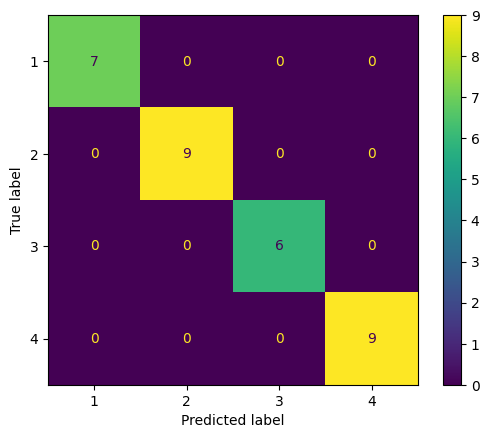

In [9]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()


In [10]:
#Salvar modelo
joblib.dump(model, 'Modelo_Exercicio6.pkl')

['Modelo_Exercicio6.pkl']